# analyze and predict the prices of the Diamonds.**

# **Importing all the necessary libraries**

In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# **Reading the Data**

In [29]:
data = pd.read_csv('diamonds.csv')
data


Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

# **Exploratory Data Analysis**

In [30]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [31]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**The data has no missing value**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**So, we have 3 object types, 1 integer type, 6 float types**

In [33]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

**Here we can see that max limits of carat, table, price, y, z seem to be abnormal.**

In [35]:
data.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

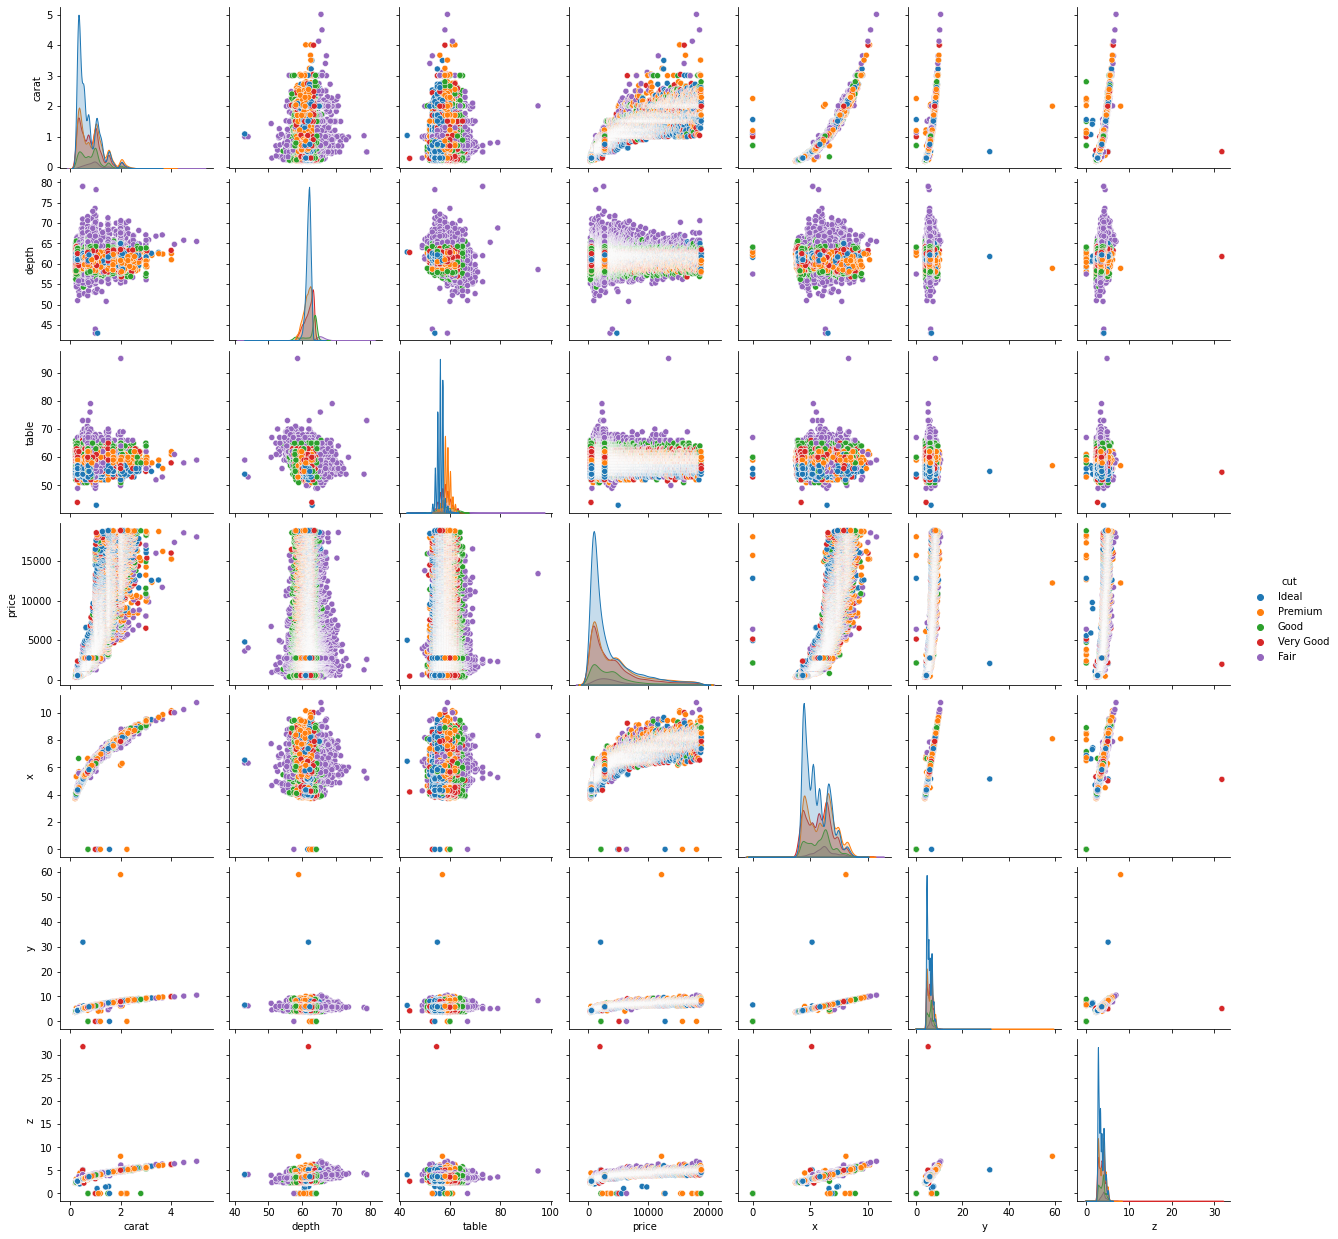

In [72]:
sns.pairplot(data,hue='cut')

# Dealing with the Outliers: 

In [36]:
data[data['x'] ==0]

carat        cut color clarity  depth  table  price    x     y    z
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0

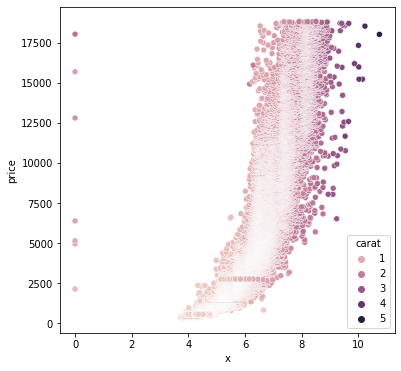

In [37]:
sns.scatterplot(x='x',y='price',hue='carat',data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


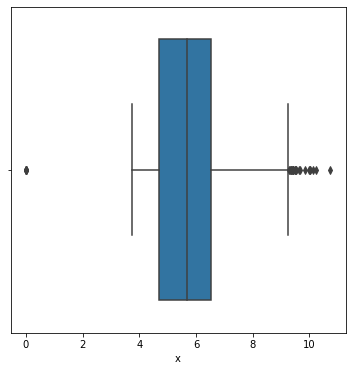

In [38]:
sns.boxplot(data['x'])

In [39]:
data[data['y']==0]

carat        cut color clarity  depth  table  price    x    y    z
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.0  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0

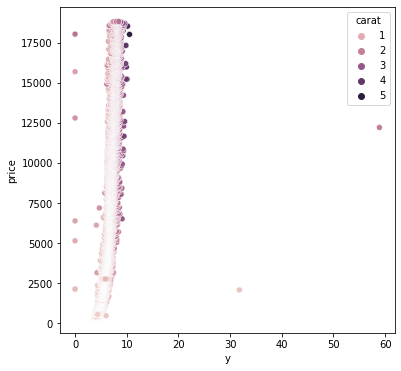

In [40]:
sns.scatterplot(x='y',y='price',hue='carat',data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


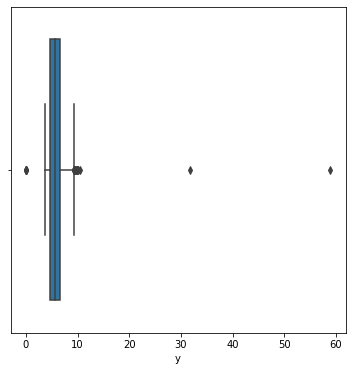

In [41]:
sns.boxplot(data['y'])

In [42]:
data[data['z']==0]

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

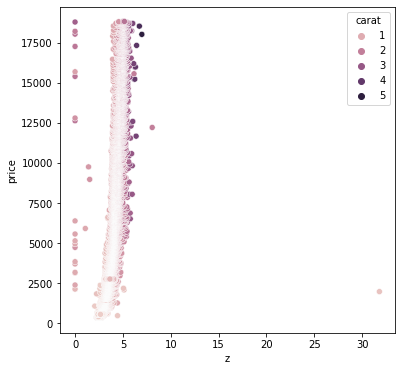

In [43]:
sns.scatterplot(x='z',y='price',hue='carat',data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


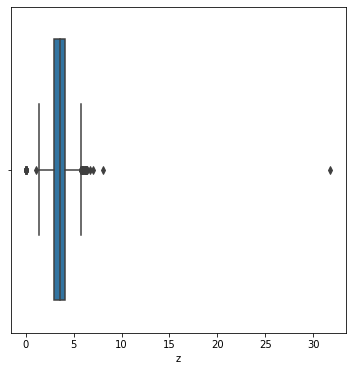

In [44]:
sns.boxplot(data['z'])


**In given data we have value in x,y,z columns is zero thts means that dimond has zero  length or width or depth**
2. **so entries with any of these are abnormal and thus dropping them.**
3. **Also, elements with width(y)>30 and depth(z)>30 seems to be outliers, so removing them too.**

# **Making a copy of original data**

In [45]:
data_new = data.copy()
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [46]:
data_new.drop(data_new.loc[(data_new['x']==0)|(data_new['y']==0)|(data_new['z']==0)|(data_new['y']>30)|(data_new['z']>30)].index,inplace=True)
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53917 rows x 10 columns]

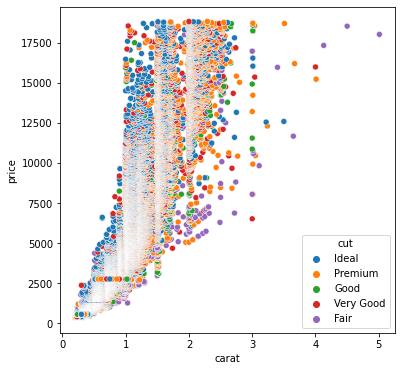

In [47]:
sns.scatterplot(x='carat',y='price',hue='cut',data=data_new)

**We can see here that as Carat increases the prices also increase.**

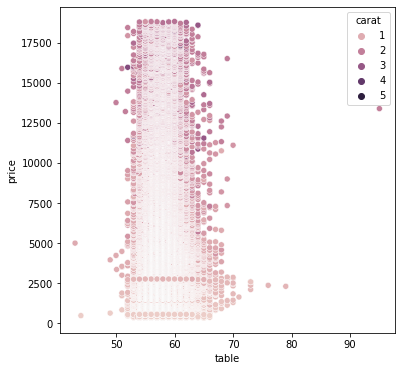

In [48]:
sns.scatterplot(x='table',y='price',hue='carat',data=data_new)

**Here, the element with table value >80 seems to be an outlier so removing it.**

In [49]:
data_new.drop(data_new.loc[data_new['table']>80].index,inplace=True)
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53916 rows x 10 columns]

In [50]:
# Checking and removing any duplicates from the data
data_new[data_new.duplicated()]
data_new.drop_duplicates(inplace=True)
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53771 rows x 10 columns]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [61]:
x=data_new.drop('price',axis=1)
x

carat  cut  color  clarity  depth  table     x     y     z
0       0.23    1      2        7   61.5   55.0  3.95  3.98  2.43
1       0.21    2      2        6   59.8   61.0  3.89  3.84  2.31
2       0.23    4      2        4   56.9   65.0  4.05  4.07  2.31
3       0.29    2      6        5   62.4   58.0  4.20  4.23  2.63
4       0.31    4      7        7   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    1      1        6   60.8   57.0  5.75  5.76  3.50
53936   0.72    4      1        6   63.1   55.0  5.69  5.75  3.61
53937   0.70    3      1        6   62.8   60.0  5.66  5.68  3.56
53938   0.86    2      5        7   61.0   58.0  6.15  6.12  3.74
53939   0.75    1      1        7   62.2   55.0  5.83  5.87  3.64

[53771 rows x 9 columns]

In [63]:
y=data_new.iloc[:,-4]
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53771, dtype: int64

# Encoding : 

In [58]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()


In [64]:
cat=['color','cut','clarity']
x[cat]=oe.fit_transform(x[cat])

In [65]:
x

carat  cut  color  clarity  depth  table     x     y     z
0       0.23  0.0    1.0      6.0   61.5   55.0  3.95  3.98  2.43
1       0.21  1.0    1.0      5.0   59.8   61.0  3.89  3.84  2.31
2       0.23  3.0    1.0      3.0   56.9   65.0  4.05  4.07  2.31
3       0.29  1.0    5.0      4.0   62.4   58.0  4.20  4.23  2.63
4       0.31  3.0    6.0      6.0   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72  0.0    0.0      5.0   60.8   57.0  5.75  5.76  3.50
53936   0.72  3.0    0.0      5.0   63.1   55.0  5.69  5.75  3.61
53937   0.70  2.0    0.0      5.0   62.8   60.0  5.66  5.68  3.56
53938   0.86  1.0    4.0      6.0   61.0   58.0  6.15  6.12  3.74
53939   0.75  0.0    0.0      6.0   62.2   55.0  5.83  5.87  3.64

[53771 rows x 9 columns]

# Standard Scaling:¶
1. Given features coulmns have not same unit so use SS
2. Scale the features to between -1 to 1


In [70]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_scaled=ss.fit_transform(x)
# x_scaled in array so it convert it into data frame
x_df= pd.DataFrame(x_scaled)
x_df.tail()

0         1         2         3         4         5         6  \
53766 -0.163810 -0.981793 -1.524605  0.639075 -0.663379 -0.205269  0.016531   
53767 -0.163810  1.706281 -1.524605  0.639075  0.945505 -1.103183 -0.037110   
53768 -0.206082  0.810256 -1.524605  0.639075  0.735651  1.141602 -0.063931   
53769  0.132097 -0.085768  0.826569  1.246335 -0.523476  0.243688  0.374142   
53770 -0.100401 -0.981793 -1.524605  1.246335  0.315942 -1.103183  0.088054   

              7         8  
53766  0.023956 -0.056871  
53767  0.014950  0.102309  
53768 -0.048087  0.029954  
53769  0.348150  0.290430  
53770  0.123015  0.145721

# **Machine Learning Algorithms**

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

**1. Linear Regression**

In [73]:
lg = LinearRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)


In [75]:

train1= lg.score(x_train,y_train)
test1= lg.score(x_test,y_test)
print(f'Training Score:{train1} \nTesting Score{test1}')

Training Score:0.9082848113496192 
Testing Score0.907706081593008


In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

print('R2 score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)) )

R2 score : 0.907706081593008
MAE : 807.4266819289049
MAPE : 0.4413792519569522
MSE : 1477460.3118440344
RMSE: 1215.508252478787


# Model Predication

In [78]:
x.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


# About this file
* A data frame with 53940 rows and 10 variables:
1. price: price in US dollars (\$326--\$18,823)
2. carat: weight of the diamond (0.2--5.01)
3. cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color: diamond colour, from J (worst) to D (best)
5. clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, 6. 6. VS2, VS1, VVS2, VVS1, IF (best))
7. x: length in mm (0--10.74)
8. y: width in mm (0--58.9)
9. z: depth in mm (0--31.8)
10. depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
11. table: width of top of diamond relative to widest point (43--95)

In [80]:
def price():
    carat= float(input('Entere  carat :'))
    ct= float(input('Entere cutting :'))
    cr= float(input('Entere color in int :'))
    
    clr= float(input('Entere clarity in int :'))
    dt= float(input('Entere depth in int :'))

    tb= float(input('Entere tabel in int :'))
    x= float(input('Entere length of diminod:'))
    y=float(input('Entere width of diminod:'))
    z=float(input('Entere higth of diminod:'))
    newobs=[[carat, cut,color, clarity, depth, table, x, y, z]]
    yp=lgpredict(newobs)[0]
    print(f"The Profit will be of ${yp}")
    return yp